# LABORATORIO 3

Julián Mauricio Sánchez Ceballos

cc: 1001132830

Departamento de Ingenieria Electrónica y de Telecomunicaciones.

UdeA

In [90]:
# Setup de la practica se agrega el -q para que no imprima el log de la instalacion


%pip install numpy -q
%pip install matplotlib -q
%pip install scipy -q
%pip install pandas -q


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings 
warnings.simplefilter("ignore")

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
def cargar_datos():
    """
    Carga los datos de un archivo CSV y devuelve un DataFrame de pandas.
    """
    df = pd.read_csv('gaitSignal.txt')
    t_zgyro = df['T_zgyro'].values          # Extraer la columna 'T_zGyro' como array de numpy

    return t_zgyro


## 2.1 PROCEDIMIENTO.

En esta sección vamos a determinar el periodo cuando la persona realiza actividades físicas. Para ello se utilizará la autocorrelación de la señal. En la mayoría de señales reales el periodo no se puede determinar directamente de la señal; sin embargo, este se puede estimar analizando la autocorrelación de la señal hallando la diferencia entre picos consecutivos de la señal de auto-correlación.

1. Normalice la señal restándole la media y luego diviendo por su máximo valor absoluto (Recuerde del laboratorio 2). Luego, grafique la señal asignada en función del tiempo y presente un breve análisis sobre la misma. 

2. ¿ Cúal es el periodo de muestreo de la señal?

3. Calcule la autocorrelación de la señal obtenida y grafiquela. ¿Qué puede concluir?

4. Realice un zoom de la autocorrelación entre 0 y 2

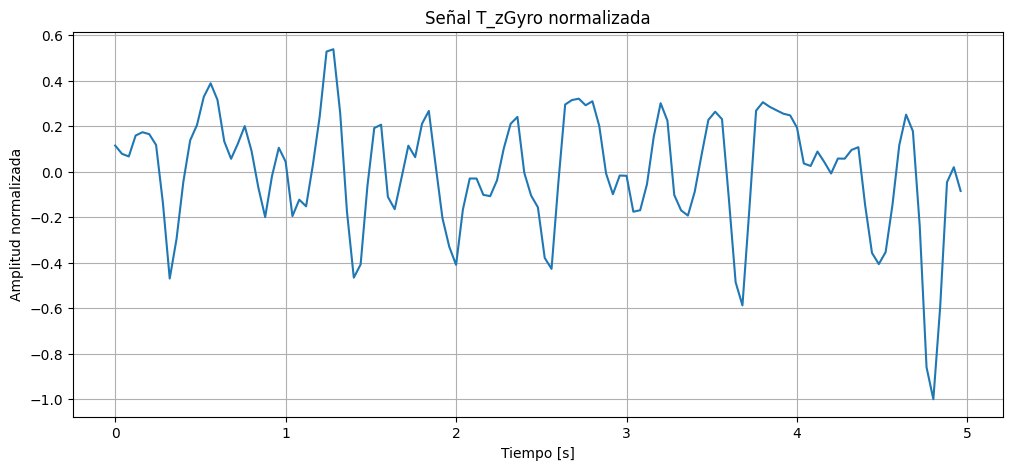

El periodo de muestreo es: 0.04 segundos


In [44]:
# Cargar datos
signal = cargar_datos()

# 1. Normalización de la señal
signal = signal - np.mean(signal)
signal = signal / np.max(np.abs(signal))

# 2. Crear un vector de tiempo
fs = 25                             # Frecuencia de muestreo de 25Hz
t = np.arange(0, len(signal)) / fs  # Vector de tiempo


# 3. Graficar la señal normalizada
plt.figure(figsize=(12, 5))
plt.plot(t, signal)
plt.title('Señal T_zGyro normalizada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud normalizada')
plt.grid(True)
plt.show()


# hallar el periodo de muestreo de la señal
Ts = 1/fs
print(f"El periodo de muestreo es: {T} segundos")


Ya con la señal normalizada y graficada se puede observar ciertos patrones, principalmente su comportamiento oscilatorio asimetrico con pendientes pronunciadas en las transiciones negativas y comportamiento cuasiperiodico con un periodo de entre 0.8s y 1s, dado el alto contenido armónico de la señal la forma no es puramente sinusoidal.  



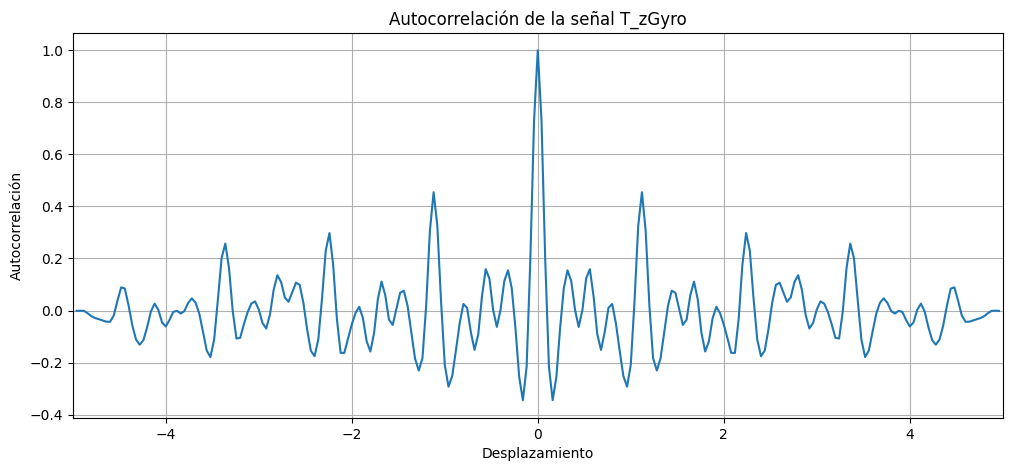

In [86]:
from scipy.signal import correlate

autocorr = correlate(signal, signal, mode='full')
#normalización de la autocorrelación
autocorr /= np.max(autocorr)

# Crear un vector de retraeso para 
lags = np.arange(-len(signal)+1, len(signal)) * Ts

plt.figure(figsize=(12, 5))
plt.plot(lags, autocorr)
plt.title('Autocorrelación de la señal T_zGyro')
plt.xlabel('Desplazamiento')
plt.xlim([-5, 5])
plt.ylabel('Autocorrelación')
plt.grid(True)
plt.show()


La correlación es una operación matematica que en el procesamiento de sañales permite obtener una medida de similitud entre dos señales, en este caso, la autocorrelación permite comparar esta misma similitud pero además también permite obtener información de la señal como su periodo, la presencia de múltiples picos espaciados regularmente indica que la señal tiene una componente periodica. El pico central en desplazamiento 0 se da debido a que en ese punto la correlación (normalizada) obtiene un valor de 1 haciendo notar que la señal es la misma en ese punto. 

  

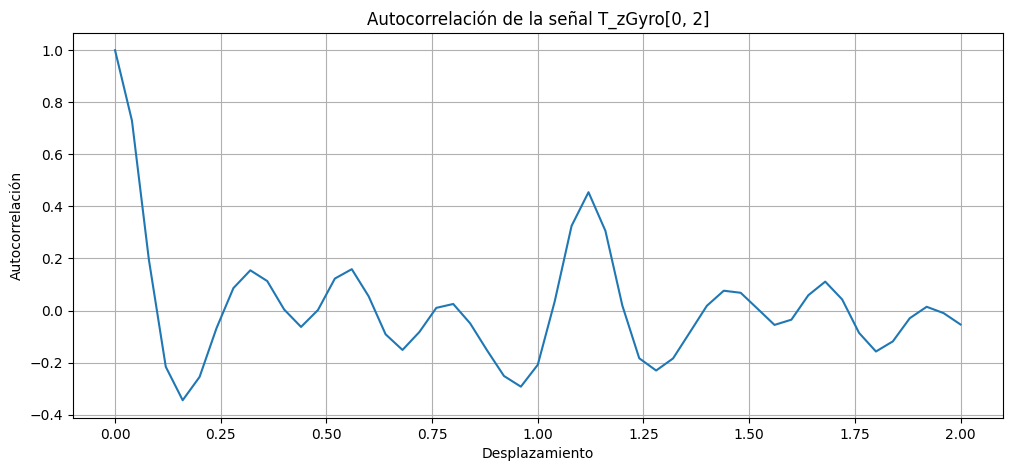

In [87]:
from scipy.signal import find_peaks

plt.figure(figsize=(12, 5))
zoomed_lags = lags[(lags >= 0) & (lags <= 2)]
zoomed_autocorr = autocorr[(lags >= 0) & (lags <= 2)]
plt.plot(zoomed_lags, zoomed_autocorr)
plt.title('Autocorrelación de la señal T_zGyro[0, 2]')
plt.xlabel('Desplazamiento')
plt.ylabel('Autocorrelación')
plt.grid(True)
plt.show()




## 2.2. Medición del periodo de la señal

El periodo de la señal corresponde al tiempo entre 0 y la posición del primer pico de la función de autocorrelación.  
Ya que es donde se encuentra la máxima similitud de las señales cuando van ocurriendo los desplazamientos.

1. Determine e indique el periodo de la señal a partir del tiempo para el primer máximo global de la autocorrelación después de cero.  
2. Buscamos solo los valores de tiempo positivo de la autocorrelación (Recuerde que la función es par).  
3. Buscamos la posición del primer máximo después del primer pico mínimo (para excluir el máximo en 0).  
4. Finalmente encontramos la posición del pico máximo.

In [83]:
peaks, _ = find_peaks(zoomed_autocorr)  # Puedes ajustar el umbral si es necesario

if len(peaks) > 1:
    # Excluir el primer pico en cero, y encontrar el pico global más alto
    peaks_without_zero = peaks[peaks > 0]  # Excluir el pico en cero

    # Buscar el pico global más alto
    max_peak_index = peaks_without_zero[np.argmax(zoomed_autocorr[peaks_without_zero])]
    
    # El periodo es la distancia entre el primer máximo (en cero) y el máximo global
    period = zoomed_lags[max_peak_index]  # Periodo en unidades de tiempo

    # Imprimir el valor máximo del pico global
    print(f"El valor del máximo global es: {zoomed_autocorr[max_peak_index]}")
    print(f"El periodo estimado de la señal es: {period} segundos")
    print(f"La frecuencia estimada de la señal es: {1/period} Hz")

else:
    print("No se encontraron suficientes picos para calcular el periodo.")


El valor del máximo global es: 0.45463420292616114
El periodo estimado de la señal es: 1.12 segundos
La frecuencia estimada de la señal es: 0.8928571428571428 Hz


## 3. Análisis de Electroencefalograma (EEG)

A continuación se trabajará con señales electroencefalográficas descritas en:  
[Descripción de la base de datos EEG](https://lampx.tugraz.at/~bci/database/001-2014/description.pdf)

En los EEGs se capturan señales por medio de sensores puestos sobre el cuero cabelludo. Estos sensores miden los cambios de potencial producidos por la sinapsis de las neuronas.

Para la base de datos se utilizaron **22 electrodos** para captar señales neuronales y **3 electrodos oculares** para caracterizar los parpadeos, organizados como se muestra en la figura 1. Las señales fueron capturadas con una frecuencia de muestreo de **250 Hz** y filtradas con un filtro pasa-bandas con frecuencias de corte de **0.5 Hz - 100 Hz**. El registro se realizó cuando el participante estaba en estado de reposo y con los ojos abiertos.

**NOTA:** En esta base de datos, los canales se cargan en filas y no por columnas como en muchos casos.  
Dimensiones del archivo: **(25, 29683)**, donde **25** es el número de canales y **29683** es el número de muestras.

* Cargue el archivo eeg.npy con numpy.load, para cada canal normalice en amplitud y elimine el nivel DC. Su canal correpondiente es el Canal 9.

*  ¿Qué observa? Describa brevemente la diferencia entre las gráficas



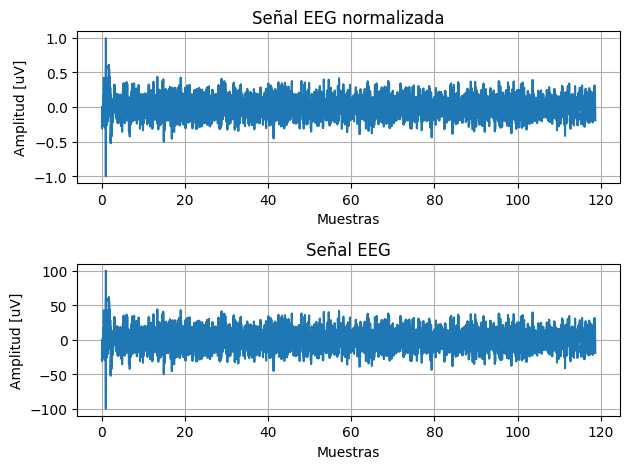

Nivel DC de la señal: 0.3931697936318768


In [92]:
channels = np.load("eeg.npy")
normalized_channels = list()
normalized_channel = list()

fs = 250 # Frecuencia de muestreo de 250Hz


for i in range(0, 25):
    normalized_channel = channels[i] / np.max(abs(channels[i]))
    normalized_channels.append(normalized_channel - np.mean(normalized_channel))


# Graficas
time = np.arange(0, len(normalized_channels[9]),1) / fs  # Vector de tiempo para la señal normalizada

plt.subplot(2,1,1)
plt.plot(time, normalized_channels[9])
plt.title('Señal EEG normalizada')
plt.xlabel('Muestras')
plt.ylabel('Amplitud [uV]')
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(time, channels[9])
plt.title('Señal EEG')
plt.xlabel('Muestras')
plt.ylabel('Amplitud [uV]')
plt.grid(True)
plt.tight_layout()


plt.show()

# nivel dc
print("Nivel DC de la señal: {}".format(np.mean(channels[9])))


La diferencia entre ambas señales es su amplitud, en primer lugar se tiene una amplitud normalizada la cual tiene valores entre 1uV y -1uV en contraste de la señal sin normalizar que muestra amplidudes cercanas a 100uV.  

## 3.1 FUNCIÓN DE AUTOCORRELACIÓN DE UN CANAL. 

1. Ahora calcule el coeficiente de correlación entre el canal que le corresponde y los otros canales. Finalmente, grafique estos coeficientes de correlación (deben ser 25) utilizando la función `plt.stem`.

_Tip: Use la función np.corrcoef para calcular los coeficientes_

2.  ¿Cómo varia la correlación entre el canal que le corresponde y los demás canales?. Realice un breve análisis de lo observado.

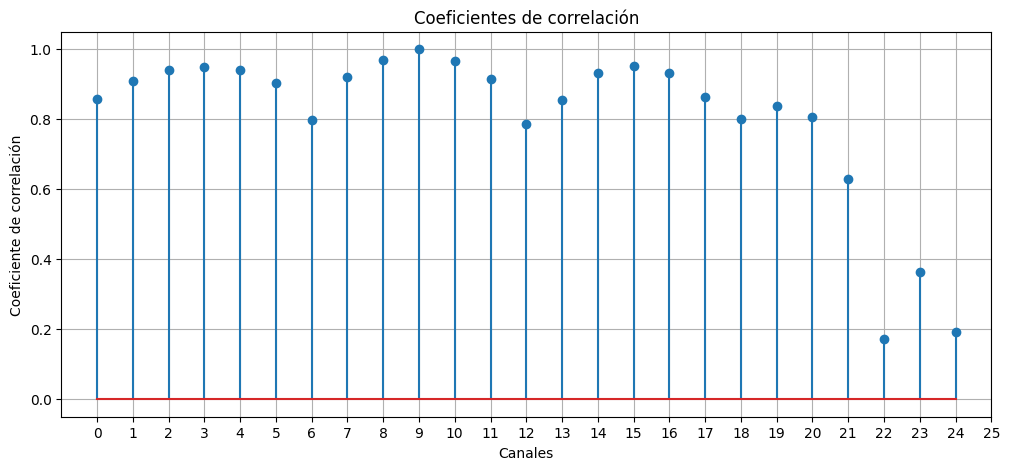

In [101]:
coeficientes = list()
coeficientes_2 = list()

for i in range(0, 25):
    coeficientes.append(np.corrcoef(normalized_channels[9], normalized_channels[i])[0])
    coeficientes_2.append(coeficientes[i][1])


plt.figure(figsize=(12, 5))

x = np.arange(0, 25, 1)
plt.stem(x, coeficientes_2)
plt.xlim(-1, 25)
plt.xticks(np.arange(0, 26, 1))
plt.title('Coeficientes de correlación')
plt.xlabel('Canales')
plt.ylabel('Coeficiente de correlación')
plt.grid(True)


Como era de esperarse en el canal 9 se obtiene el valor de correlación más alto, dado que es precisamente con este canal que se hace la correlación con los demas canales, incluyendose a si mismo (autocorrelación) Además, dado que se trata de canales que captan señales neuronales, los valores de correlación altos y cercanos a 1 indican que cuando hay un proceso neuronal en el canal 9 se activan otros canales en diferentes partes del cerebro. 

### 3.2. Función de autocorrelación de un canal

1. Calcule la función de autocorrelación del canal que le corresponde, luego calcule la función de autocorrelación para uno de los canales de los ojos (canal 22 o 24), finalmente grafique y compare las dos funciones utilizando subplots.

2. ¿Qué observa?. Describa brevemente las gráficas obtenidas.

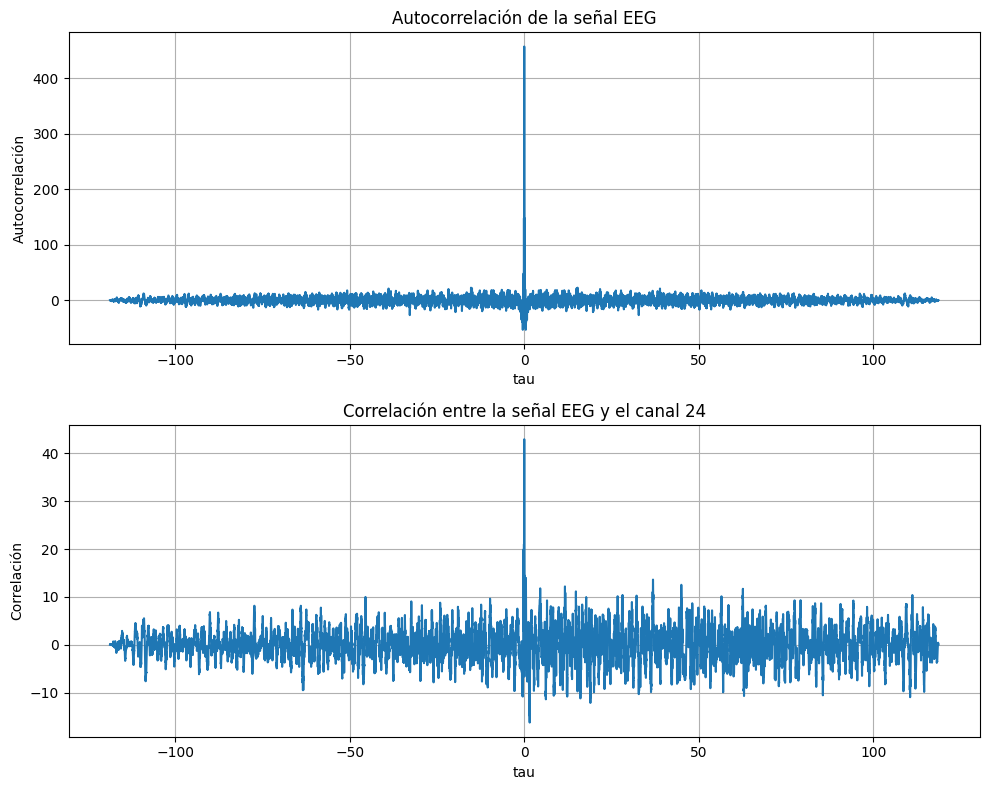

In [105]:
# Autocorrelación
Rxx2 = correlate(normalized_channels[9], normalized_channels[9], mode='full')
tau2 = np.arange(-len(normalized_channels[9])+1, len(normalized_channels[9])) * (1/fs)

# correlacion con el canal 24
Rxy2 = correlate(normalized_channels[9], normalized_channels[24], mode='full')
tau3 = np.arange(-len(normalized_channels[9])+1, len(normalized_channels[9])) * (1/fs)

#grafica de la autocorrelacion
plt.figure(figsize=(10, 8))
plt.subplot(2,1,1)
plt.plot(tau2, Rxx2)
plt.title('Autocorrelación de la señal EEG')
plt.xlabel('tau')
plt.ylabel('Autocorrelación')
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(tau3, Rxy2)
plt.title('Correlación entre la señal EEG y el canal 24')
plt.xlabel('tau')
plt.ylabel('Correlación')
plt.grid(True)

plt.tight_layout()
plt.show()


Mediante la correlación entre dos canales de un EEG es piosible ver que regiones del cerebro están sincronizadas, debido a su capacidad de medir la similitud entre dos señales en diferentes momentos. Además por propiedades de la autocorrelación es posible medir la energia de una señal concluyendo en que para este caso la energia de una señal neuronal es mayor que la energia de las señales de un parpadeo. 

## CONCLUSIONES. 

* La función de correlación ademas de una herramienta matematica para el proceso de señales también cuenta con funcionalidades utiles como la comparación de similitud entre dos señales, mediciones de periodos, o relaciones de mediciones en experimentos o procedimientos medicos como se ejemplificó en el estudio del EEG. 

* Además de lo anterior mencionado, se puede evidenciar una relación con la energía de la señal en $\tau = 0$ esto debido a que en una autocorrelación este punto coincide con la suma de los valores al cuadrado de la propia señal. Es este contexto es posible determinar que señales en un EEG presentan mayor energia lo que puede ser (y seguramente lo es) usado en aplicaciones de monitoreo medico. Haciendo uso de las propiedades de la correlación se puede desarrollar multiples aplicaciones con esta herramienta matematica como lo pueden ser radares ultrasonicos ó detectores de envolventes en sistemas de comunicación. 

* La correlación no implica causalidad :)